# Part 3: Demo Analysis
This part of the program conducts a preliminary analysis of the data set collected in Part 2. 

The main question of this analysis is the following: 
* "How strong is the relationship between desired and market wages derived from the online job board hh.ru?" 

## Example of regression analysis using resume data

In [172]:
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn import linear_model
import matplotlib.pyplot as plt

%matplotlib inline

### Data structure
Let's take a look at the data set first.

In [173]:
# Read data into a DataFrame
data = pd.read_csv('resume_data_short.csv')
data.head()
#data.tail()

,id,resumeId,ln_desired_wage,ln_market_wage,number_vac_100,ln_market_wage_min,ln_market_wage_max,age_norm,male,higher_edu,years_after_edu_norm,exp_number_norm,exp_years_norm,relocation,bus_trip,specialization,ratio
0,41300001,c2b3ed850001bec7b40039ed1f794978676776,4.30,4.43,0,4.10,4.72,-0.87,0,1,-0.70,-0.74,-1.16,0,1,5,0.75
1,41300003,4312305f0003b7cdb30039ed1f316b4c6c4b33,3.40,4.56,1,4.20,5.08,-0.98,1,0,-0.47,-1.13,-1.16,0,0,22,0.07
2,41300005,051bf7f40001644aa60039ed1f384a50384750,4.70,4.65,1,4.24,5.30,-0.32,0,1,-0.35,1.21,-0.03,0,1,4,1.11
3,41300006,1790010c0001f77bec0039ed1f4853674f3331,4.18,4.49,1,4.00,5.08,-1.31,1,0,-1.27,-1.52,-1.30,0,0,15,0.48
4,41300008,a190e584000382cdcb0039ed1f505863386554,4.43,4.74,1,4.18,5.48,-1.31,1,0,-0.93,-0.35,-1.16,0,0,15,0.50


There are 3 candidates for the response: 
* *ln_market_wage*: logarithm of market wage -- average value across all vacancies;
* *ln_market_wage_min*: logarithm of market wage -- the lowest value across all vacancies;
* *ln_market_wage_max*: logarithm of market wage -- the highes value across all vacancies.

### Graphical presentation of the data set

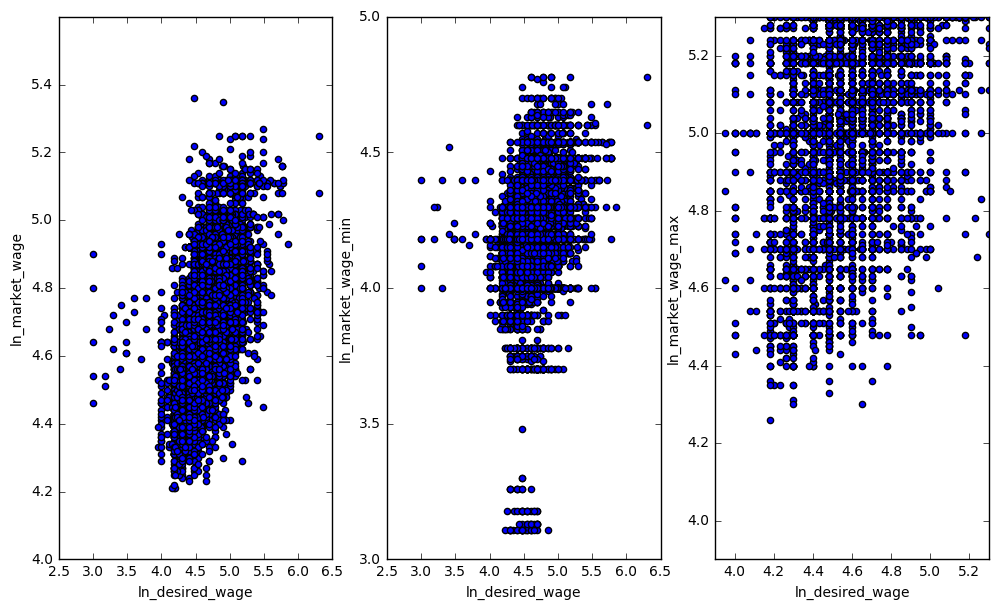

In [174]:
# Visualize the relationship between desired and market wages using scatterplots

fig, axs = plt.subplots(1, 3, sharey=False)
data.plot(kind='scatter', x='ln_desired_wage', y='ln_market_wage', ax=axs[0], figsize=(12, 7))
data.plot(kind='scatter', x='ln_desired_wage', y='ln_market_wage_min', ax=axs[1])
data.plot(kind='scatter', x='ln_desired_wage', y='ln_market_wage_max', ax=axs[2])
plt.xlim(3.9, 5.3)
plt.ylim(3.9, 5.3)
plt.show()

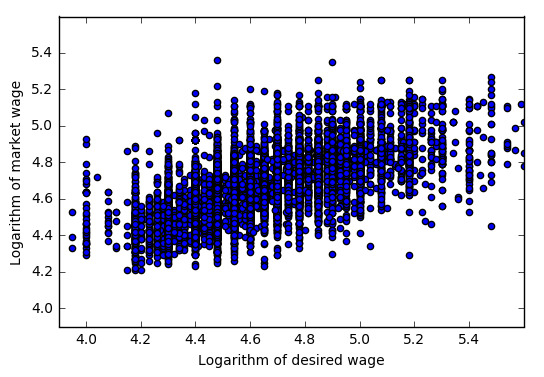

In [175]:
# ln_market_wage is preferred response

# Visualize the relationship between the features and the response using scatterplots
plt.scatter(data['ln_desired_wage'], data['ln_market_wage'])
plt.xlim(3.9, 5.6)
plt.ylim(3.9, 5.6)
plt.xlabel('Logarithm of desired wage')
plt.ylabel('Logarithm of market wage')
plt.show()

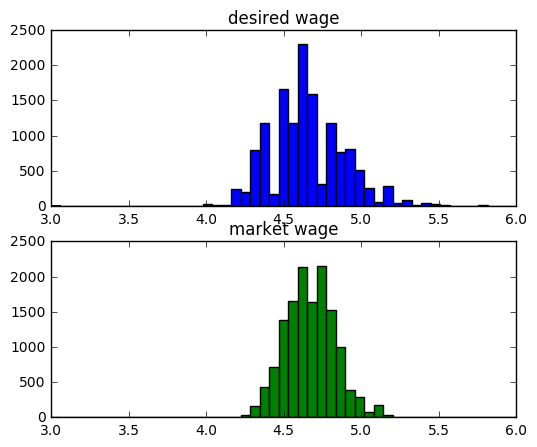

In [221]:
# Visualize the distribution of desired and market wages using histograms
fig = plt.figure(figsize=(6, 5))
bins = np.linspace(3, 6, 50)
ax0 = plt.subplot2grid((2, 1), (0, 0), colspan=4)
ax0.hist(data['ln_desired_wage'], bins)
ax0.set_title('desired wage')
ax1 = plt.subplot2grid((2, 1), (1, 0), colspan=4)
ax1.hist(data['ln_market_wage'], bins, color='green')
ax1.set_title('market wage')
plt.show()

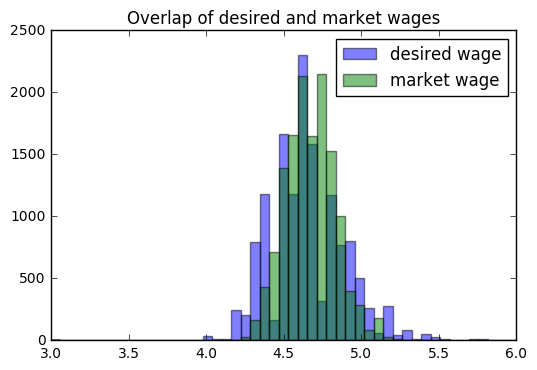

In [209]:
# Visualize the distribution of desired and market wages on the same graph
bins = np.linspace(3, 6, 50)
plt.hist(data['ln_desired_wage'], bins, alpha=0.5, label='desired wage')
plt.hist(data['ln_market_wage'], bins, alpha=0.5, label='market wage')
plt.legend(loc='upper right')
plt.title('Overlap of desired and market wages')
plt.show()

# Model description

**The response**:
* *ln_market_wage* (logarithm of market wage -- average value).

**The features**:
* *ln_desired_wage* (logarithm of desired wage);
* *number_vac_100* (number of vacancies for market wage calculation >= 100 -- indicator);
* *age_norm* ( years of age -- normalized);
* *male* (person is a male -- indicator);
* *higher_edu* (has higher education -- indicator);
* *years_after_edu_norm* (years after graduation -- normalized);
* *exp_number_norm* (number of jobs -- normalized);
* *exp_years_norm* (years of working experience -- normalized);
* *relocation* (ready to move to another city -- indicator);
* *bus_trip* (ready to have business trips -- indicator).


### Simple univariate regression in scikit-learn

In [166]:
# Create X (independent) and y (dependent) variables
feature_cols = ['ln_desired_wage']
X = data[feature_cols]
y = data['ln_market_wage']
print(X.shape)

(13827, 1)


Intercept:  2.71667372791
Coefficients:  [ 0.42142683]
Mean squared error on the test set: 0.02
Variance score on the test set: 0.37


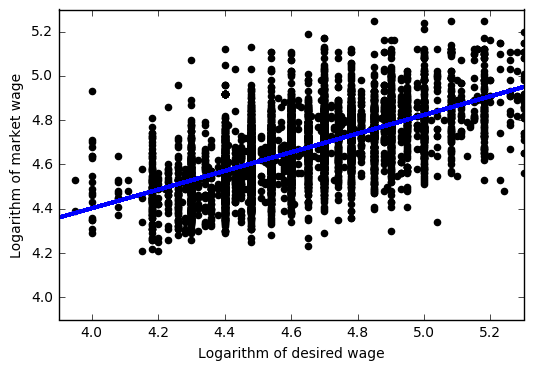

In [169]:
X_train = X[:7000]
X_test = X[7000:]

y_train = y[:7000]
y_test = y[7000:]

# Create linear regression object: 
lm = linear_model.LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train) # training set is used to train the model

# Print intercept and the coefficients
print('Intercept: ', lm.intercept_,)
print('Coefficients: ', lm.coef_)

# Print the mean squared error
print('Mean squared error on the test set: {:.2f}'. format (np.mean((lm.predict(X_test) - y_test) ** 2)))
      
# Print the explained variance score: 1 is a perfect prediction
print('Variance score on the test set: {:.2f}'.format(lm.score(X_test, y_test)))

# Plot test data and predictions
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, lm.predict(X_test), color='blue', linewidth=2.5)
plt.xlim(3.9, 5.3)
plt.ylim(3.9, 5.3)
plt.xlabel('Logarithm of desired wage')
plt.ylabel('Logarithm of market wage')
plt.show()

### Multivariate regression in Statsmodels

The response is **logarithm of market wage**.

In [207]:
import pandas as pd
import statsmodels.api as sm

feature_cols = ['ln_desired_wage', 'number_vac_100', 'male', 'higher_edu', 'relocation']
X = data[feature_cols]
X = sm.add_constant(X)
y = data['ln_market_wage']

# Fit and summarize OLS model
mod = sm.OLS(y, X)
results = mod.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_market_wage   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     2353.
Date:                Mon, 17 Apr 2017   Prob (F-statistic):               0.00
Time:                        21:46:59   Log-Likelihood:                 9921.9
No. Observations:               13827   AIC:                        -1.983e+04
Df Residuals:                   13821   BIC:                        -1.979e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               2.9784      0.020    1

The response is the following ratio: **logarithm of desired wage/logarithm of market wage**.

In [206]:
import pandas as pd
import statsmodels.api as sm

feature_cols = ['male', 'higher_edu', 'years_after_edu_norm', 'exp_number_norm',  'relocation', 'bus_trip']
X = data[feature_cols]
X = sm.add_constant(X)
y = data['ratio']

# Fit and summarize OLS model
mod = sm.OLS(y, X)
results = mod.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     319.0
Date:                Mon, 17 Apr 2017   Prob (F-statistic):               0.00
Time:                        18:13:24   Log-Likelihood:                -10997.
No. Observations:               13827   AIC:                         2.201e+04
Df Residuals:                   13820   BIC:                         2.206e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                    0.7435 